# __Read Data in__

In [1]:
# read data in directly from GitHub in raw version

import pandas as pd
import numpy as np
edu = pd.read_csv('https://raw.githubusercontent.com/MQCOMP257/introduction-datascience-python-book/master/files/ch02/educ_figdp_1_Data.csv',
                 na_values = ':',
                 usecols = ["TIME", "GEO", "Value"])

In [2]:
# show dataframe

edu

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
...,...,...,...
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85


In [3]:
# show first five rows only

edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [4]:
# show last five rows only

edu.tail()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


In [5]:
# show statistical summary of numeric columns

edu.describe()

,TIME,Value
count,384.000000,361.000000
mean,2005.500000,5.203989
std,3.456556,1.021694
min,2000.000000,2.880000
25%,2002.750000,4.620000
50%,2005.500000,5.060000
75%,2008.250000,5.660000
max,2011.000000,8.810000


In [6]:
# display the column names

edu.columns

Index(['TIME', 'GEO', 'Value'], dtype='object')

In [7]:
# display the indexes

edu.index

RangeIndex(start=0, stop=384, step=1)

In [8]:
# retrieve values of dataframe as a Python array

edu.values

array([[2000, 'European Union (28 countries)', nan],
       [2001, 'European Union (28 countries)', nan],
       [2002, 'European Union (28 countries)', 5.0],
       ...,
       [2009, 'Finland', 6.81],
       [2010, 'Finland', 6.85],
       [2011, 'Finland', 6.76]], dtype=object)

# Selecting Data

In [9]:
# select one column from a DataFrame

edu["Value"]

0       NaN
1       NaN
2      5.00
3      5.03
4      4.95
       ... 
379    5.90
380    6.10
381    6.81
382    6.85
383    6.76
Name: Value, Length: 384, dtype: float64

In [10]:
# select a subset of rows from a DataFrame

edu[10:14] # selects rows 10-13

,TIME,GEO,Value
10,2010,European Union (28 countries),5.41
11,2011,European Union (28 countries),5.25
12,2000,European Union (27 countries),4.91
13,2001,European Union (27 countries),4.99


In [11]:
# select a subset of rows and columns with ix indexing

edu.loc[90:94, ["TIME", "GEO"]]

,TIME,GEO
90,2006,Belgium
91,2007,Belgium
92,2008,Belgium
93,2009,Belgium
94,2010,Belgium


# Filtering Data

In [12]:
# select a subset of data by applying Boolean indexing

edu[edu["Value"] > 6.5].tail()

,TIME,GEO,Value
286,2010,Malta,6.74
287,2011,Malta,7.96
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


# Filtering Missing Values

In [13]:
# filter for missing values

edu[edu["Value"].isnull()].head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
36,2000,Euro area (18 countries),NaN
37,2001,Euro area (18 countries),NaN
48,2000,Euro area (17 countries),NaN


# Manipulating Data

In [14]:
# apply aggregate function to rows for each column

edu.max(axis=0)

TIME      2011
GEO      Spain
Value     8.81
dtype: object

In [15]:
# apply aggregate function to columns for each row

edu.max(axis=1)

0      2000.0
1      2001.0
2      2002.0
3      2003.0
4      2004.0
        ...  
379    2007.0
380    2008.0
381    2009.0
382    2010.0
383    2011.0
Length: 384, dtype: float64

In [16]:
# apply aggregate function to one column of DataFrame

edu["Value"].max()

8.81

In [17]:
# apply operations on a column

s = edu["Value"] / 100
s.head()

0       NaN
1       NaN
2    0.0500
3    0.0503
4    0.0495
Name: Value, dtype: float64

In [18]:
# apply function to a column of a DataFrame

s = edu["Value"].apply(np.sqrt)
s.head()

0         NaN
1         NaN
2    2.236068
3    2.242766
4    2.224860
Name: Value, dtype: float64

In [19]:
# apply an in-line (lambda) function to a column of a DataFrame

s = edu["Value"].apply(lambda d: d**2)
s.head()

0        NaN
1        NaN
2    25.0000
3    25.3009
4    24.5025
Name: Value, dtype: float64

In [20]:
# create a new column with the result of an operation applied to a column

edu["ValueNorm"] = edu["Value"] / edu["Value"].max()
edu.tail()

,TIME,GEO,Value,ValueNorm
379,2007,Finland,5.90,0.669694
380,2008,Finland,6.10,0.692395
381,2009,Finland,6.81,0.772985
382,2010,Finland,6.85,0.777526
383,2011,Finland,6.76,0.767310


In [21]:
# delete a column from a DataFrame

edu.drop("ValueNorm", axis=1, inplace=True)
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [22]:
# insert a new row at the end of a DataFrame

edu = edu.append({"TIME": 2000,
                 "Value": 5.00,
                 "GEO": "a"},
                ignore_index=True) # otherwise index 0 is given to the new line
edu.tail()

,TIME,GEO,Value
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76
384,2000,a,5.00


In [23]:
# remove the last row from a DataFrame

edu.drop(max(edu.index), 
         axis=0, 
         inplace=True) # removes an automatically saved copy
edu.tail()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


In [24]:
# remove missing values with the drop() function

eduDrop = edu.dropna(how='any', subset=["Value"], axis=0)
eduDrop.head()

,TIME,GEO,Value
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
5,2005,European Union (28 countries),4.92
6,2006,European Union (28 countries),4.91


In [25]:
# fill missing values with another value

eduFilled = edu.fillna(value={"Value": 0})
eduFilled.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),0.00
1,2001,European Union (28 countries),0.00
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


# Sorting Data

In [26]:
# sort a DataFrame in descending order

edu.sort_values(by='Value', ascending=False, inplace=True)
edu.head()

,TIME,GEO,Value
130,2010,Denmark,8.81
131,2011,Denmark,8.75
129,2009,Denmark,8.74
121,2001,Denmark,8.44
122,2002,Denmark,8.44


In [28]:
# return to original order

edu.sort_index(axis=0, ascending=True, inplace=True)
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


## Grouping Data

In [31]:
# show mean of the values for each country 

group = edu[['GEO', 'Value']].groupby('GEO').mean()
group.head()

,Value
GEO,
Austria,5.618333
Belgium,6.189091
Bulgaria,4.093333
Cyprus,7.023333
Czech Republic,4.168333


## Rearranging Data

In [35]:
# change indices and columns

filtered_data = edu[edu['TIME'] > 2005]
pivedu = pd.pivot_table(filtered_data, 
                        values='Value', 
                        index=['GEO'], 
                       columns=['TIME'])
pivedu

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51
Denmark,7.97,7.81,7.68,8.74,8.81,8.75
Estonia,4.70,4.72,5.61,6.03,5.66,5.16
Euro area (13 countries),4.87,4.80,4.94,5.32,5.28,5.15
Euro area (15 countries),4.87,4.81,4.95,5.32,5.29,5.16


In [34]:
# use new index to select specific rows by label

pivedu.loc[['Spain', 'Portugal'], [2006, 2011]]

TIME,2006,2011
GEO,,
Spain,4.26,4.82
Portugal,5.07,5.27


## Ranking Data

In [36]:
# clean country names to only have country names 

pivedu = pivedu.drop(['Euro area (13 countries)',
                      'Euro area (15 countries)',
                      'Euro area (17 countries)',
                      'Euro area (18 countries)',
                      'European Union (25 countries)',
                      'European Union (27 countries)',
                      'European Union (28 countries)'
                     ], axis=0)


# short germany's name

pivedu = pivedu.rename(index={
    'Germany (until 1990 former territory of the FRG)': 'Germany'
})


# remove missing values

pivedu = pivedu.dropna()


# rank pivoted DataFrame

pivedu.rank(ascending=False,
           method='first').head()


TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,10.0,7.0,11.0,7.0,8.0,8.0
Belgium,5.0,4.0,3.0,4.0,5.0,5.0
Bulgaria,21.0,21.0,20.0,20.0,22.0,22.0
Cyprus,2.0,2.0,2.0,2.0,2.0,3.0
Czech Republic,19.0,20.0,21.0,21.0,20.0,19.0


In [37]:
# rank countries over all years
# first sum columns

totalSum = pivedu.sum(axis=1)

# then rank the sums

totalSum.rank(ascending=False, method='dense').sort_values().head()

GEO
Denmark    1.0
Cyprus     2.0
Finland    3.0
Malta      4.0
Belgium    5.0
dtype: float64

## Plotting Data

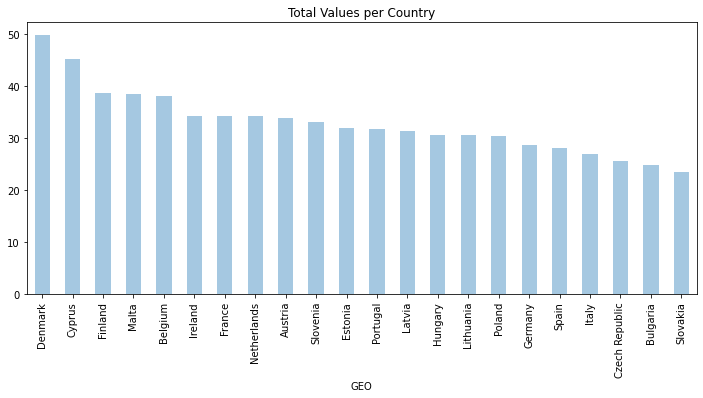

In [42]:
import matplotlib.pyplot as plt

# create a figure

fig = plt.figure(figsize=(12, 5))

# create the sum per country and sort to have bar chart from highest to lowest

totalSum = pivedu.sum(axis=1).sort_values(ascending=False)

# create the plot

totalSum.plot(kind='bar', # bar chart
             style='b', # blue bars
             alpha=0.4, # adjusting transparency
             title='Total Values per Country') # specify title

# save the plot

plt.savefig('Totalvalue_Country.png', # name
            dpi=300, # resolution
            bbox_inches='tight') 

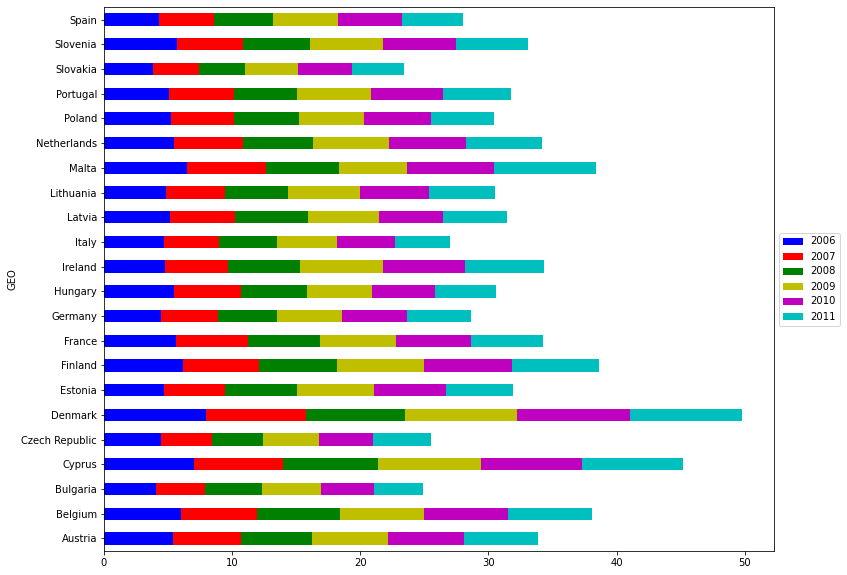

In [48]:
# stacked bar chart
# create a list of colours

my_colours = ['b', 'r', 'g', 'y', 'm', 'c']

# create the plot

ax = pivedu.plot(kind='barh', # horizontal bar chart
                 stacked=True, # stack different columns for each country
                 color=my_colours, # specify colour range
                 figsize=(12, 10)) # specify plot size

# adjust the legend

ax.legend(loc='center left', # position of legend relative to plot
          bbox_to_anchor=(1, 0.5)) # set absolut position of legend

# save plot

plt.savefig('Value_Time_Country.png', 
            dpi=300, 
            bbox_inches='tight')